In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
japan = pd.read_csv("../data/japan.csv")
kyoto = pd.read_csv("../data/kyoto.csv")
liestal = pd.read_csv("../data/liestal.csv")
meteo = pd.read_csv("../data/meteoswiss.csv")
wash = pd.read_csv("../data/washingtondc.csv")

In [3]:
print("Japan:      ", japan.columns)
print("Kyoto:      ", kyoto.columns)
print("Liestal:    ",liestal.columns)
print("Meteoswiss: ", meteo.columns)
print("Washington: ", wash.columns)

Japan:       Index(['location', 'lat', 'long', 'alt', 'year', 'bloom_date', 'bloom_doy'], dtype='object')
Kyoto:       Index(['location', 'lat', 'long', 'alt', 'year', 'bloom_date', 'bloom_doy'], dtype='object')
Liestal:     Index(['location', 'lat', 'long', 'alt', 'year', 'bloom_date', 'bloom_doy'], dtype='object')
Meteoswiss:  Index(['location', 'lat', 'long', 'alt', 'year', 'bloom_date', 'bloom_doy'], dtype='object')
Washington:  Index(['location', 'lat', 'long', 'alt', 'year', 'bloom_date', 'bloom_doy'], dtype='object')


Some databases have country/city and others are just city data. 
1. Is the specific city data still in the country data?
   *  Actually, the Japan and Kyoto datasets are from different sources. There is some variation between them. Minor, but not a perfect match. 
2. What is the year range between the two datasets? 
   * See below, the Kyoto dataset has a lot more observations than the Japan dataset. 

In [26]:
print('### COMPARING JAPAN AND KYOTO DATASETS')
jp_2000 = [japan.loc[(japan['location'] == 'Japan/Kyoto') & (japan['year'].between(2000, 2005))], kyoto.loc[kyoto['year'].between(2000,2005)]]
print(pd.concat(jp_2000).sort_values(by = ['year']))

print("### COMPARING YEARS COVERED")
print("The Kyoto dataset ranges from {0} to {1}".format(kyoto.year.min(), kyoto.year.max()))
print("The Japan (Kyoto) dataset ranges from {0} to {1}".format(japan.loc[japan['location'] == 'Japan/Kyoto'].year.min(), japan.loc[japan['location'] == 'Japan/Kyoto'].year.max()))

### COMPARING JAPAN AND KYOTO DATASETS
         location        lat        long    alt  year  bloom_date  bloom_doy
4370  Japan/Kyoto  35.014722  135.732778  40.81  2000  2000-04-10        101
811         kyoto  35.011983  135.676114  44.00  2000  2000-04-09        100
4371  Japan/Kyoto  35.014722  135.732778  40.81  2001  2001-04-03         93
812         kyoto  35.011983  135.676114  44.00  2001  2001-04-06         96
4372  Japan/Kyoto  35.014722  135.732778  40.81  2002  2002-03-28         87
813         kyoto  35.011983  135.676114  44.00  2002  2002-04-01         91
4373  Japan/Kyoto  35.014722  135.732778  40.81  2003  2003-04-04         94
814         kyoto  35.011983  135.676114  44.00  2003  2003-04-08         98
4374  Japan/Kyoto  35.014722  135.732778  40.81  2004  2004-04-03         94
815         kyoto  35.011983  135.676114  44.00  2004  2004-04-01         92
4375  Japan/Kyoto  35.014722  135.732778  40.81  2005  2005-04-08         98
816         kyoto  35.011983  135.676

Because of the differences above, I'm going to stick to the three competition datasets to start with.

In [28]:
## Combine the competition dataframes into the same
cherry_data = pd.concat([kyoto, liestal, wash])

<AxesSubplot:xlabel='year'>

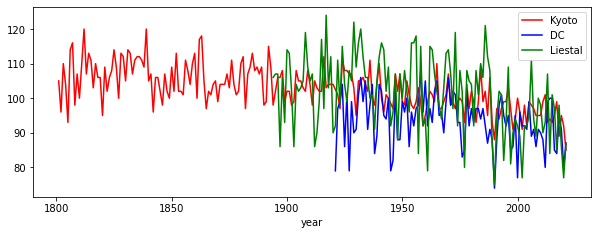

In [61]:
ax = plt.gca()
plt.rcParams["figure.figsize"] = [10, 3.50]
cherry_data.loc[(cherry_data['location'] == 'kyoto') & (cherry_data['year'] > 1800)].plot(x = 'year', y = 'bloom_doy', label = 'Kyoto', color = 'red', ax=ax)
cherry_data.loc[cherry_data['location'] == 'washingtondc'].plot(x = 'year', y = 'bloom_doy', label = 'DC', color = 'blue', ax=ax)
cherry_data.loc[cherry_data['location'] == 'liestal'].plot(x = 'year', y = 'bloom_doy', label = 'Liestal', color = 'green', ax=ax)

Text(0, 0.5, 'Altitude')

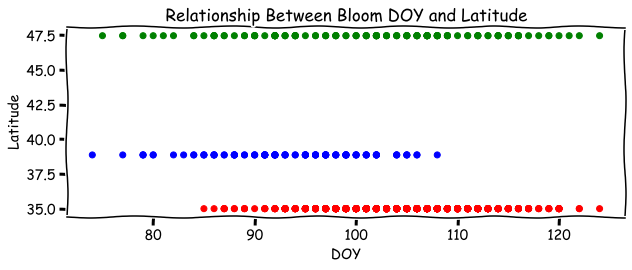

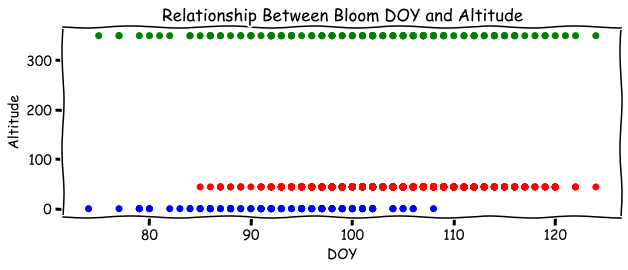

In [136]:
colors = {'kyoto':'red', 'washingtondc':'blue','liestal':'green'}
fig, ax = plt.subplots()
ax.scatter(cherry_data['bloom_doy'], cherry_data['lat'], c = cherry_data['location'].map(colors))
ax.set_title('Relationship Between Bloom DOY and Latitude')
ax.set_xlabel('DOY')
ax.set_ylabel('Latitude')

fig, alt = plt.subplots()
alt.scatter(cherry_data['bloom_doy'], cherry_data['alt'], c = cherry_data['location'].map(colors))
alt.set_title('Relationship Between Bloom DOY and Altitude')
alt.set_xlabel('DOY')
alt.set_ylabel('Altitude')


ValueError: Shape of passed values is (1062, 3), indices imply (1062, 4)

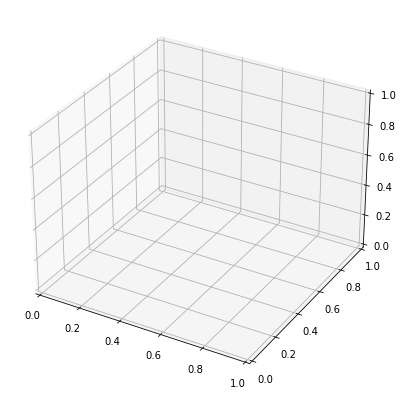

In [103]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

std_scaler = StandardScaler()
plot_data = cherry_data[['location', 'lat', 'alt', 'bloom_doy']]

plot_data = std_scaler.fit_transform(plot_data[['lat', 'alt','bloom_doy']].to_numpy())
plot_data = pd.DataFrame(plot_data, columns=['location','lat', 'alt', 'bloom'])

#Creating plot
ax.scatter3D(plot_data.lat, plot_data.alt, plot_data.bloom, color = 'red' )

 
# show plot
plt.show()